In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
import numpy as np

In [2]:
X, y = loadlocal_mnist(
        images_path='/Users/gaozhenyu/Desktop/Netherlands/MyENN/mnist/train-images-idx3-ubyte', 
        labels_path='/Users/gaozhenyu/Desktop/Netherlands/MyENN/mnist/train-labels-idx1-ubyte')

numbers = [0, 1, 2] # number 2 > number 1
number_of_classification = len(numbers)
number_of_sampling = 100

list_y = y.tolist()


import random
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(random.sample(li, number_of_sampling))    
    
samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

In [3]:
# x_output = np.zeros(samplesize*number_of_classification).reshape(samplesize,number_of_classification)
# for count,ele in enumerate(y[digits_indexes].tolist()):
#     x_output[count][ele] = 1
# x_outputs = [tuple(c) for c in x_output.tolist()]

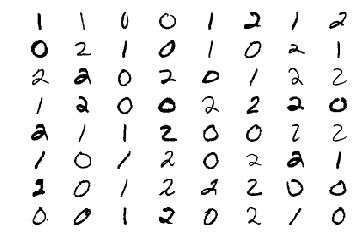

In [4]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, len(x_inputs))]).reshape(28,28), cmap='Greys')
plt.show()

In [5]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [ ]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        pred_outputs[pred_outputs==2] = numbers[2]
        pred_outputs[pred_outputs==1] = numbers[1]
        pred_outputs[pred_outputs==0] = numbers[0]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 1000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist3")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.33102 stdev: 0.10256
Best fitness: 0.58333 - size: (3, 235) - species 2 - id 155
Average adjusted fitness: 0.271
Mean genetic distance 2.908, standard deviation 0.382
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.38586 stdev: 0.09522
Best fitness: 0.66333 - size: (4, 237) - species 5 - id 252
Average adjusted fitness: 0.223
Mean genetic distance 3.022, standard deviation 0.407
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 13.703 sec (12.045 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.42087 stdev: 0.10332
Best fitness: 0.66333 - size: (4, 237) - species 5 - id 252
Average adjusted fitness: 0.290
Mean genetic distance 3.049, standard deviation 0.408
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 15.765 sec (1

Population's average fitness: 0.63012 stdev: 0.11444
Best fitness: 0.87000 - size: (12, 254) - species 10 - id 3093
Average adjusted fitness: 0.252
Mean genetic distance 3.220, standard deviation 0.452
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 12.603 sec (12.908 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62641 stdev: 0.12092
Best fitness: 0.87000 - size: (12, 254) - species 10 - id 3093
Average adjusted fitness: 0.280
Mean genetic distance 3.229, standard deviation 0.463
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 13.164 sec (12.925 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63438 stdev: 0.12632
Best fitness: 0.87000 - size: (12, 254) - species 10 - id 3093
Average adjusted fitness: 0.349
Mean genetic distance 3.267, standard deviation 0.464
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 12.256 sec (12.761 avera

In [ ]:
number_of_test = 100

import random
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(random.sample(li, number_of_test))

testsamplesize = X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in y[digits_indexes].reshape(testsamplesize,1).tolist()]

In [ ]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(test_x_inputs[randint(0, testsamplesize)]).reshape(28,28), cmap='Greys')
plt.show()

In [ ]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)

px_outputs = softmax(np.array(outputs).reshape(testsamplesize, number_of_classification), axis=1)
# the index of maximum in each line
pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
pred_outputs[pred_outputs==2] = numbers[2]
pred_outputs[pred_outputs==1] = numbers[1]
pred_outputs[pred_outputs==0] = numbers[0]

real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

acc = np.sum(pred_outputs == real_outputs)/testsamplesize
print("Accuracy: {}".format(acc))